In [1]:
import numpy as np
import keras  
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
import matplotlib.pyplot as plt
import random

C:\Users\supriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
#load the dataset
X_train=np.loadtxt("C:\\Users\\supriya\\Downloads\\input.csv",delimiter=",")
y_train=np.loadtxt("C:\\Users\\supriya\\Downloads\\labels.csv",delimiter=",")
X_test=np.loadtxt("C:\\Users\\supriya\\Downloads\\input_test.csv",delimiter=",")
y_test=np.loadtxt("C:\\Users\\supriya\\Downloads\\labels_test.csv",delimiter=",")

In [3]:
X_train

array([[ 37.,  39.,  25., ...,  58.,  54.,  29.],
       [131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [4]:
X_train=X_train.reshape(len(X_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [5]:
X_train

array([[[[ 37.,  39.,  25.],
         [ 26.,  24.,   9.],
         [ 34.,  25.,  10.],
         ...,
         [ 57.,  44.,  35.],
         [ 61.,  47.,  38.],
         [ 65.,  51.,  42.]],

        [[ 45.,  43.,  28.],
         [ 28.,  25.,   8.],
         [ 52.,  40.,  24.],
         ...,
         [ 54.,  41.,  32.],
         [ 57.,  43.,  34.],
         [ 61.,  47.,  38.]],

        [[ 52.,  45.,  26.],
         [ 32.,  24.,   5.],
         [ 69.,  54.,  35.],
         ...,
         [ 54.,  40.,  29.],
         [ 56.,  42.,  31.],
         [ 59.,  45.,  34.]],

        ...,

        [[ 20.,  39.,   0.],
         [101., 125.,  67.],
         [152., 182., 120.],
         ...,
         [ 46.,  41.,  19.],
         [ 60.,  55.,  33.],
         [ 60.,  55.,  33.]],

        [[ 46.,  65.,   9.],
         [116., 140.,  82.],
         [156., 186., 124.],
         ...,
         [ 64.,  60.,  35.],
         [ 75.,  71.,  46.],
         [ 72.,  68.,  43.]],

        [[ 81., 100.,  44.],
       

In [6]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [7]:
X_test

array([[[[118.,  82.,  96.],
         [109.,  71.,  82.],
         [116.,  77.,  78.],
         ...,
         [170., 134., 100.],
         [165., 129.,  93.],
         [163., 127.,  91.]],

        [[ 95.,  62.,  73.],
         [104.,  69.,  76.],
         [110.,  75.,  73.],
         ...,
         [174., 138., 102.],
         [170., 134.,  98.],
         [167., 132.,  94.]],

        [[177., 148., 153.],
         [181., 151., 153.],
         [173., 142., 137.],
         ...,
         [175., 141., 103.],
         [171., 137.,  99.],
         [168., 135.,  94.]],

        ...,

        [[ 63.,  60.,  77.],
         [ 65.,  64.,  80.],
         [ 65.,  67.,  82.],
         ...,
         [148.,  98.,  63.],
         [155.,  98.,  43.],
         [145.,  84.,  19.]],

        [[ 58.,  55.,  72.],
         [ 60.,  59.,  75.],
         [ 60.,  62.,  77.],
         ...,
         [132.,  82.,  49.],
         [143.,  86.,  31.],
         [138.,  77.,  14.]],

        [[ 58.,  55.,  72.],
       

In [8]:
y_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [9]:
X_train=X_train/255.0
X_test=X_test/255.0

In [10]:
X_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

In [11]:
X_test

array([[[[0.4627451 , 0.32156863, 0.37647059],
         [0.42745098, 0.27843137, 0.32156863],
         [0.45490196, 0.30196078, 0.30588235],
         ...,
         [0.66666667, 0.5254902 , 0.39215686],
         [0.64705882, 0.50588235, 0.36470588],
         [0.63921569, 0.49803922, 0.35686275]],

        [[0.37254902, 0.24313725, 0.28627451],
         [0.40784314, 0.27058824, 0.29803922],
         [0.43137255, 0.29411765, 0.28627451],
         ...,
         [0.68235294, 0.54117647, 0.4       ],
         [0.66666667, 0.5254902 , 0.38431373],
         [0.65490196, 0.51764706, 0.36862745]],

        [[0.69411765, 0.58039216, 0.6       ],
         [0.70980392, 0.59215686, 0.6       ],
         [0.67843137, 0.55686275, 0.5372549 ],
         ...,
         [0.68627451, 0.55294118, 0.40392157],
         [0.67058824, 0.5372549 , 0.38823529],
         [0.65882353, 0.52941176, 0.36862745]],

        ...,

        [[0.24705882, 0.23529412, 0.30196078],
         [0.25490196, 0.25098039, 0.31372549]

In [12]:
print("shape of X_train:",X_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


In [13]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

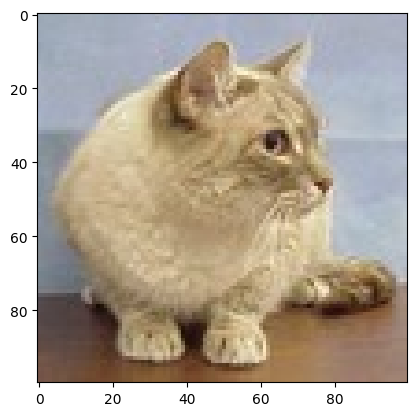

In [14]:
import random
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()


In [15]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation="relu", input_shape=(100, 100, 3)), 
    MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),                
    
    # Flatten and Dense Layers
    Flatten(),
    Dense(64, activation="relu"),          
    Dense(1, activation="sigmoid")
])
    

C:\Users\supriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    loss="binary_crossentropy", 
    optimizer="adam",    
    metrics=["accuracy"]
)
model.fit(X_train,y_train,epochs=5,batch_size=64)
model.evaluate(X_test,y_test)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.5030 - loss: 0.7356
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.5400 - loss: 0.6942
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.6310 - loss: 0.6612
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.6605 - loss: 0.6212
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.7140 - loss: 0.5677
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6275 - loss: 0.6898


[0.6897811889648438, 0.6274999976158142]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
[[0.46992642]]


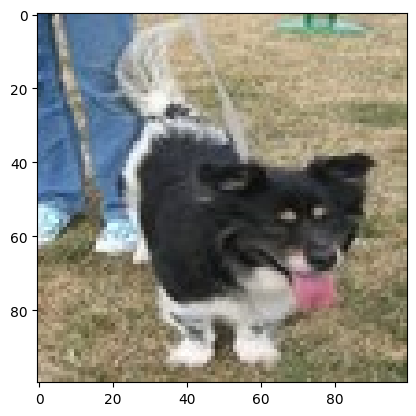

In [25]:
#make prediction
idx2=random.randint(0,len(y_test))
plt.imshow(X_test[idx2,:])
plt.show
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)


In [24]:
y_pred=y_pred>0.5
if (y_pred==0):
    p="dog"
else:
    r="cat"
    print("our model says it is a:",y_pred)

our model says it is a: [[ True]]
